In [ ]:
# Last amended: 26th June, 2020
# My folder: D:\data\OneDrive\Documents\bank_loan_status
# Ref: Kaggle: https://www.kaggle.com/zaurbegiev/my-dataset
#      Bank Loan Status Dataset
# Objectives:
#                    i) Filling up missing values
#                   ii) Using ColumnTransformer and Pipeline
#                   iii)Decision tree modeling

In [ ]:
# 1.0 Call libraries
import pandas as pd
import numpy as np

# 1.1
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import  SimpleImputer

# 1.2
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 1.3
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 1.4
import matplotlib.pyplot as plt
import seaborn as sns

# 1.5
# Install as: >conda install -c conda-forge umap-learn
# Uniform Manifold Approximation and Projection for
#  Dimension Reduction,
import umap
import os
import re

In [ ]:
# 2.0 Display multiple outputs from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# 2.1 Set some options
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
# Format / Suppress Scientific Notation from Python Pandas Aggregation Results
# https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results
pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(precision = 3)

In [4]:
# 3.0 Set data path and read data
dataPath = "D:/data/OneDrive/Documents/bank_loan_status"
#dataPath = "/home/ashok/Documents/bank_loan_status"

os.chdir(dataPath)
os.listdir()
loan_status = pd.read_csv("credit_train.csv")

['.ipynb_checkpoints',
 'Bank Loan Status--Simple.ipynb',
 'bank_loan_status.py',
 'credit_test.csv',
 'credit_train.csv']

In [5]:
# 3.1 Look at dataset
loan_status.head()
loan_status.shape
loan_status.columns.values

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,nan,6.00,1.00,228190.00,416746.00,1.00,0.00
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.00,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,8.00,35.00,0.00,229976.00,850784.00,0.00,0.00
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,29.00,18.00,1.00,297996.00,750090.00,0.00,0.00
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,nan,9.00,0.00,256329.00,386958.00,0.00,0.00
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.00,Short Term,nan,nan,5 years,Rent,Debt Consolidation,20639.70,6.10,nan,15.00,0.00,253460.00,427174.00,0.00,0.00


(100514, 19)

array(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount',
       'Term', 'Credit Score', 'Annual Income', 'Years in current job',
       'Home Ownership', 'Purpose', 'Monthly Debt',
       'Years of Credit History', 'Months since last delinquent',
       'Number of Open Accounts', 'Number of Credit Problems',
       'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies',
       'Tax Liens'], dtype=object)

In [6]:
# 3.2 Get number of unique values in the two IDs
loan_status['Loan ID'].unique().size
loan_status['Customer ID'].unique().size

82000

82000

In [7]:
# 3.3 Drop columns with mostly unique values
loan_status.drop(columns = ['Loan ID', "Customer ID"], inplace = True)

In [8]:
# 3.4 For conveneince, remove spaces from column names and also turn into lowercase
loan_status.columns = [re.sub(" ", "_", col.lower()) for col in loan_status.columns.values ]

In [9]:
# 3.5 Examine summary stat of numeric data
loan_status.describe() 
# Observation:
# current_loan_amount 99999999 appears to stand for NaN
# credit_score is skewed to right
# annual_income is skewed to right
# monthly_debt is skewed to right
# All numeric columns are right-skewed

,current_loan_amount,credit_score,annual_income,monthly_debt,years_of_credit_history,months_since_last_delinquent,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
count,100000.00,80846.00,80846.00,100000.00,100000.00,46859.00,100000.00,100000.00,100000.00,99998.00,99796.00,99990.00
mean,11760447.39,1076.46,1378276.56,18472.41,18.20,34.90,11.13,0.17,294637.38,760798.38,0.12,0.03
std,31783942.55,1475.40,1081360.20,12174.99,7.02,22.00,5.01,0.48,376170.93,8384503.47,0.35,0.26
min,10802.00,585.00,76627.00,0.00,3.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,179652.00,705.00,848844.00,10214.16,13.50,16.00,8.00,0.00,112670.00,273438.00,0.00,0.00
50%,312246.00,724.00,1174162.00,16220.30,16.90,32.00,10.00,0.00,209817.00,467874.00,0.00,0.00
75%,524942.00,741.00,1650663.00,24012.06,21.70,51.00,14.00,0.00,367958.75,782958.00,0.00,0.00
max,99999999.00,7510.00,165557393.00,435843.28,70.50,176.00,76.00,15.00,32878968.00,1539737892.00,7.00,15.00


## Missing values

In [10]:
# 4.0 Get NaN status. Number 514 is a common value
loan_status.isnull().sum()
# Check top 100000 rows
loan_status[:100000].isnull().sum()

loan_status                       514
current_loan_amount               514
term                              514
credit_score                    19668
annual_income                   19668
years_in_current_job             4736
home_ownership                    514
purpose                           514
monthly_debt                      514
years_of_credit_history           514
months_since_last_delinquent    53655
number_of_open_accounts           514
number_of_credit_problems         514
current_credit_balance            514
maximum_open_credit               516
bankruptcies                      718
tax_liens                         524
dtype: int64

loan_status                         0
current_loan_amount                 0
term                                0
credit_score                    19154
annual_income                   19154
years_in_current_job             4222
home_ownership                      0
purpose                             0
monthly_debt                        0
years_of_credit_history             0
months_since_last_delinquent    53141
number_of_open_accounts             0
number_of_credit_problems           0
current_credit_balance              0
maximum_open_credit                 2
bankruptcies                      204
tax_liens                          10
dtype: int64

In [11]:
# 4.1 Drop bottom 514 rows, being NaNs
loan_status = loan_status[:100000]
# 4.2 And recheck columns with null values
loan_status.isnull().sum().sort_values(ascending = False)[:10]

months_since_last_delinquent    53141
credit_score                    19154
annual_income                   19154
years_in_current_job             4222
bankruptcies                      204
tax_liens                          10
maximum_open_credit                 2
home_ownership                      0
current_loan_amount                 0
term                                0
dtype: int64

In [12]:
# 4.3 Column 'months_since_last_delinquent' has very large number of nulls
#     So drop it
loan_status.drop(columns = ['months_since_last_delinquent'], inplace = True)

In [13]:
# 4.4 Get a list of numeric columns for plotting density plots
cols = loan_status.select_dtypes(include = ['float64', 'int64']).columns
cols
len(cols)   # 11
loan_status[cols].dtypes   # All are float64

Index(['current_loan_amount', 'credit_score', 'annual_income', 'monthly_debt',
       'years_of_credit_history', 'number_of_open_accounts',
       'number_of_credit_problems', 'current_credit_balance',
       'maximum_open_credit', 'bankruptcies', 'tax_liens'],
      dtype='object')

11

current_loan_amount          float64
credit_score                 float64
annual_income                float64
monthly_debt                 float64
years_of_credit_history      float64
number_of_open_accounts      float64
number_of_credit_problems    float64
current_credit_balance       float64
maximum_open_credit          float64
bankruptcies                 float64
tax_liens                    float64
dtype: object

(12,)

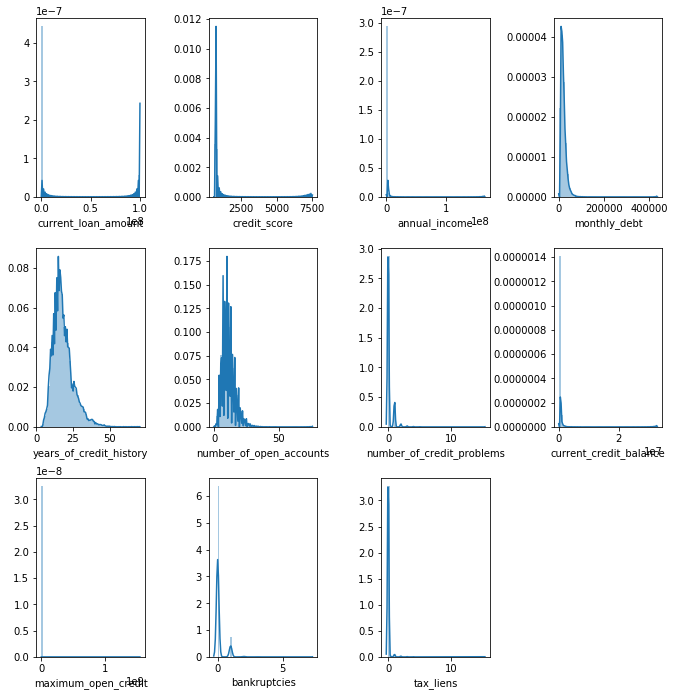

In [14]:
# 4.5 Let us plot them
#     All plots are right-skewed
#     There is a seaborn bandwidth error while plotting one feature.
#     To remove error, add:    kde_kws={'bw': 0.1}
# See: https://stackoverflow.com/a/61924418/3282777
fig, ax = plt.subplots(3,4, figsize = (10,10))
fig.tight_layout(pad = 3.0)
ax = ax.flatten()
fig.delaxes(ax[11])
ax.shape
for i,j in enumerate(cols.values):
    abc = sns.distplot(loan_status[j], ax = ax[i],  kde_kws={'bw': 0.1})

In [15]:
# 5.0 Let us first deal with NaN in 'years_in_current_job'
loan_status['years_in_current_job'].value_counts(dropna = False)

10+ years    31121
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
NaN           4222
9 years       3955
Name: years_in_current_job, dtype: int64

In [16]:
# 5.1 Since number of NaNs are large, we will fill them with a new
#     value, 'missing'
loan_status['years_in_current_job'].fillna('missing', inplace = True)

In [17]:
# 5.2 Next let us examine: bankruptcies
loan_status['bankruptcies'].value_counts(dropna = False)

0.00    88774
1.00    10475
2.00      417
nan       204
3.00       93
4.00       27
5.00        7
6.00        2
7.00        1
Name: bankruptcies, dtype: int64

In [18]:
# 5.3 Examine those rows where 'bankruptcies' is NaN
#     There appears to be some relationship with 'number_of_credit_problems'
#     https://stackoverflow.com/a/26535881/3282777
loan_status.query('bankruptcies != bankruptcies ')

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
905,Charged Off,495066.00,Short Term,712.00,1766012.00,3 years,Rent,Debt Consolidation,23693.95,15.60,11.00,0.00,14991.00,168432.00,nan,0.00
1699,Charged Off,324830.00,Short Term,717.00,709916.00,8 years,Rent,Debt Consolidation,12955.91,13.80,14.00,0.00,280421.00,753346.00,nan,0.00
1995,Charged Off,553080.00,Short Term,740.00,1910640.00,1 year,Rent,Business Loan,2499.64,26.00,9.00,0.00,323.00,376090.00,nan,0.00
3462,Fully Paid,67166.00,Short Term,741.00,707579.00,4 years,Rent,other,1586.31,21.50,4.00,0.00,28842.00,100606.00,nan,0.00
4587,Charged Off,245146.00,Short Term,705.00,1010477.00,1 year,Home Mortgage,Debt Consolidation,15072.89,17.50,14.00,0.00,342038.00,760144.00,nan,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98675,Charged Off,110462.00,Short Term,nan,nan,< 1 year,Rent,Business Loan,0.00,15.00,5.00,0.00,16701.00,35354.00,nan,0.00
99327,Fully Paid,103554.00,Short Term,nan,nan,< 1 year,Rent,Debt Consolidation,7065.15,15.90,5.00,0.00,7619.00,10780.00,nan,0.00
99407,Charged Off,450428.00,Short Term,718.00,1867225.00,< 1 year,Home Mortgage,small_business,27697.25,18.60,5.00,0.00,1805.00,0.00,nan,0.00
99413,Fully Paid,295042.00,Short Term,733.00,702126.00,< 1 year,Rent,Debt Consolidation,7372.38,14.40,9.00,0.00,193477.00,678898.00,nan,0.00


In [19]:
# 5.4 Recheck this relationship
loan_status.query('bankruptcies == 1.0').sort_values(by= 'number_of_credit_problems',
                                                     ascending = False
                                                     ).head()
loan_status.query('bankruptcies == 1.0').sort_values(by= 'number_of_credit_problems').head()

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
29922,Fully Paid,166364.00,Short Term,nan,nan,missing,Own Home,Debt Consolidation,13140.97,32.40,11.00,10.00,132620.00,463914.00,1.00,9.00
83305,Fully Paid,114928.00,Short Term,736.00,1049921.00,10+ years,Home Mortgage,Debt Consolidation,5345.84,14.90,11.00,6.00,118617.00,329384.00,1.00,0.00
5034,Fully Paid,342650.00,Short Term,711.00,2522611.00,10+ years,Home Mortgage,Business Loan,14610.24,14.40,7.00,6.00,110257.00,235994.00,1.00,5.00
91627,Fully Paid,342650.00,Short Term,711.00,2522611.00,10+ years,Home Mortgage,Business Loan,14610.24,14.40,7.00,6.00,110257.00,235994.00,1.00,5.00
82747,Fully Paid,268356.00,Short Term,739.00,1268896.00,missing,Own Home,Debt Consolidation,14698.21,15.80,15.00,5.00,939892.00,3278000.00,1.00,4.00


,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,6.00,1.00,228190.00,416746.00,1.00,0.00
65974,Fully Paid,507782.00,Short Term,nan,nan,10+ years,Rent,Debt Consolidation,19745.18,16.50,10.00,1.00,224770.00,502414.00,1.00,0.00
65976,Charged Off,227458.00,Short Term,688.00,841928.00,5 years,Rent,Debt Consolidation,16277.11,16.50,14.00,1.00,102562.00,242858.00,1.00,0.00
65977,Fully Paid,257422.00,Long Term,724.00,676229.00,8 years,Home Mortgage,Debt Consolidation,17356.50,24.10,6.00,1.00,57399.00,246136.00,1.00,0.00
65981,Fully Paid,99999999.00,Short Term,735.00,1577323.00,4 years,Home Mortgage,Debt Consolidation,17744.86,16.60,15.00,1.00,360278.00,541068.00,1.00,0.00


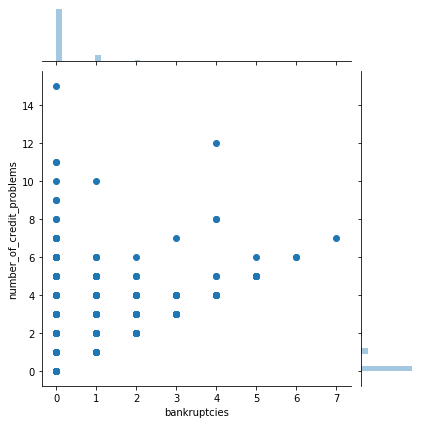

In [20]:
# 5.5 Just to reconfirm, create a joint plot
#     Relationship becomes obvious. At least this much is obvious
#     for 'bankruptcies' to have a value of 1 or more,
#     'number_of_credit_problems' should at least be 1 or more
abc = sns.jointplot(
                    loan_status['bankruptcies'],
                    loan_status['number_of_credit_problems']
                    )

In [21]:
# 5.6 We, thrrefore, fillup 'bankruptcies' accordingly
loan_status['bankruptcies'].fillna(0.0, inplace = True)

In [22]:
# 5.7 Let us check nulls again
loan_status.isnull().sum().sort_values(ascending = False)

annual_income                19154
credit_score                 19154
tax_liens                       10
maximum_open_credit              2
bankruptcies                     0
current_credit_balance           0
number_of_credit_problems        0
number_of_open_accounts          0
years_of_credit_history          0
monthly_debt                     0
purpose                          0
home_ownership                   0
years_in_current_job             0
term                             0
current_loan_amount              0
loan_status                      0
dtype: int64

In [23]:
# 5.8 Examine 'maximum_open_credit'
#     Let us see rows having NaN values
#     One row has many NaNs. We will delete this row
loan_status.query('maximum_open_credit != maximum_open_credit')

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
30180,Charged Off,32340.00,Short Term,nan,nan,2 years,Rent,Debt Consolidation,9620.46,15.30,3.00,0.00,0.00,nan,0.00,0.00
98710,Charged Off,45144.00,Short Term,7030.00,1806995.00,10+ years,Rent,Debt Consolidation,36290.38,22.40,9.00,0.00,0.00,nan,0.00,0.00


In [24]:
# 5.9 Deletion of row with index 30180
loan_status[loan_status.index == 30180]
loan_status.shape
loan_status.drop(index = 30180, inplace = True)
loan_status.shape

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
30180,Charged Off,32340.00,Short Term,nan,nan,2 years,Rent,Debt Consolidation,9620.46,15.30,3.00,0.00,0.00,nan,0.00,0.00


(100000, 16)

(99999, 16)

In [25]:
# 6.0 Use median to fill up values in 'maximum_open_credit'
med = np.nanmedian(loan_status['maximum_open_credit'].values)
med
loan_status['maximum_open_credit'].fillna(med, inplace = True)
loan_status.isnull().sum().sort_values(ascending = False)

467874.0

annual_income                19153
credit_score                 19153
tax_liens                       10
bankruptcies                     0
maximum_open_credit              0
current_credit_balance           0
number_of_credit_problems        0
number_of_open_accounts          0
years_of_credit_history          0
monthly_debt                     0
purpose                          0
home_ownership                   0
years_in_current_job             0
term                             0
current_loan_amount              0
loan_status                      0
dtype: int64

In [26]:
# 6.1 Next examine, tax_liens
loan_status['tax_liens'].value_counts(dropna = False)
# 6.2 tax_liens != tax_liens shows up all rows where tax_liens is NaN
loan_status.query('tax_liens != tax_liens')  # 

0.00     98061
1.00      1343
2.00       374
3.00       111
4.00        58
5.00        16
6.00        12
nan         10
7.00         7
9.00         3
11.00        2
15.00        1
10.00        1
Name: tax_liens, dtype: int64

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
9632,Fully Paid,99999999.00,Short Term,632.00,968202.00,1 year,Rent,Debt Consolidation,10166.14,13.00,12.00,0.00,57038.00,71566.00,0.00,nan
10546,Fully Paid,110792.00,Short Term,720.00,1530944.00,< 1 year,Own Home,Debt Consolidation,1543.75,20.00,15.00,1.00,520239.00,3741474.00,0.00,nan
19274,Fully Paid,118712.00,Short Term,746.00,1431441.00,7 years,Home Mortgage,Debt Consolidation,17177.33,24.50,15.00,0.00,132392.00,1064536.00,0.00,nan
20727,Fully Paid,78738.00,Short Term,735.00,262276.00,< 1 year,Rent,Educational Expenses,3584.35,13.60,10.00,0.00,55632.00,156750.00,0.00,nan
28595,Fully Paid,259952.00,Short Term,702.00,1403207.00,9 years,Own Home,Debt Consolidation,17540.04,21.30,9.00,0.00,805239.00,998250.00,0.00,nan
28811,Fully Paid,109362.00,Short Term,nan,nan,< 1 year,Home Mortgage,other,11711.60,27.70,17.00,0.00,1617090.00,267490058.00,0.00,nan
43369,Fully Paid,43032.00,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,785.46,25.10,14.00,0.00,87476.00,547558.00,0.00,nan
46430,Fully Paid,111012.00,Short Term,nan,nan,8 years,Home Mortgage,Home Improvements,0.00,28.60,2.00,0.00,116071.00,689194.00,0.00,nan
57336,Fully Paid,110792.00,Short Term,nan,nan,< 1 year,Own Home,Debt Consolidation,1543.75,20.00,15.00,1.00,520239.00,3741474.00,0.00,nan
86062,Fully Paid,259952.00,Short Term,702.00,1403207.00,9 years,Own Home,Debt Consolidation,17540.04,21.30,9.00,0.00,805239.00,998250.00,0.00,nan


In [27]:
# 6.3 See rows where tax_liens is 0
loan_status.query('tax_liens  == 0.0')

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
0,Fully Paid,445412.00,Short Term,709.00,1167493.00,8 years,Home Mortgage,Home Improvements,5214.74,17.20,6.00,1.00,228190.00,416746.00,1.00,0.00
1,Fully Paid,262328.00,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,35.00,0.00,229976.00,850784.00,0.00,0.00
2,Fully Paid,99999999.00,Short Term,741.00,2231892.00,8 years,Own Home,Debt Consolidation,29200.53,14.90,18.00,1.00,297996.00,750090.00,0.00,0.00
3,Fully Paid,347666.00,Long Term,721.00,806949.00,3 years,Own Home,Debt Consolidation,8741.90,12.00,9.00,0.00,256329.00,386958.00,0.00,0.00
4,Fully Paid,176220.00,Short Term,nan,nan,5 years,Rent,Debt Consolidation,20639.70,6.10,15.00,0.00,253460.00,427174.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Fully Paid,147070.00,Short Term,725.00,475437.00,7 years,Own Home,other,2202.86,22.30,5.00,0.00,47766.00,658548.00,0.00,0.00
99996,Fully Paid,99999999.00,Short Term,732.00,1289416.00,1 year,Rent,Debt Consolidation,13109.05,9.40,22.00,0.00,153045.00,509234.00,0.00,0.00
99997,Fully Paid,103136.00,Short Term,742.00,1150545.00,6 years,Rent,Debt Consolidation,7315.57,18.80,12.00,1.00,109554.00,537548.00,1.00,0.00
99998,Fully Paid,530332.00,Short Term,746.00,1717524.00,9 years,Rent,Debt Consolidation,9890.07,15.00,8.00,0.00,404225.00,738254.00,0.00,0.00


In [28]:
# 6.4 Fill up NaNs in tax_liens with 0 value
loan_status['tax_liens'].fillna(0.0, inplace = True)
loan_status.isnull().sum()

loan_status                      0
current_loan_amount              0
term                             0
credit_score                 19153
annual_income                19153
years_in_current_job             0
home_ownership                   0
purpose                          0
monthly_debt                     0
years_of_credit_history          0
number_of_open_accounts          0
number_of_credit_problems        0
current_credit_balance           0
maximum_open_credit              0
bankruptcies                     0
tax_liens                        0
dtype: int64

In [29]:
# 6.5 Do nan values in colums, credit_score' and 'annual_income' go hand in hand
#     Yes, they do
loan_status.query('credit_score ! = credit_score')

,loan_status,current_loan_amount,term,credit_score,annual_income,years_in_current_job,home_ownership,purpose,monthly_debt,years_of_credit_history,number_of_open_accounts,number_of_credit_problems,current_credit_balance,maximum_open_credit,bankruptcies,tax_liens
1,Fully Paid,262328.00,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.10,35.00,0.00,229976.00,850784.00,0.00,0.00
4,Fully Paid,176220.00,Short Term,nan,nan,5 years,Rent,Debt Consolidation,20639.70,6.10,15.00,0.00,253460.00,427174.00,0.00,0.00
7,Charged Off,648714.00,Long Term,nan,nan,< 1 year,Home Mortgage,Buy House,14806.13,8.20,15.00,0.00,193306.00,864204.00,0.00,0.00
11,Fully Paid,541970.00,Short Term,nan,nan,10+ years,Home Mortgage,Home Improvements,23568.55,23.20,23.00,0.00,60705.00,1634468.00,0.00,0.00
15,Fully Paid,449020.00,Long Term,nan,nan,9 years,Own Home,Debt Consolidation,18904.81,19.40,8.00,0.00,334533.00,428956.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99978,Fully Paid,431860.00,Long Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,8465.07,18.50,5.00,0.00,241319.00,476806.00,0.00,0.00
99982,Fully Paid,484968.00,Long Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,20941.80,23.70,15.00,0.00,804175.00,1322662.00,0.00,0.00
99988,Charged Off,309474.00,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,13817.18,26.90,15.00,0.00,225872.00,892606.00,0.00,0.00
99989,Charged Off,429132.00,Short Term,nan,nan,10+ years,Home Mortgage,Debt Consolidation,28948.02,16.30,16.00,0.00,485279.00,656414.00,0.00,0.00


In [30]:
# 6.6 Fill up both with median values
loan_status['annual_income'].fillna(loan_status['annual_income'].median(), inplace = True)
loan_status['credit_score'].fillna(loan_status['credit_score'].median(), inplace = True)

In [31]:
# 6.7 Are there rows with outliers only?
#     Get 98th percentile of Annual Income
per = np.percentile(loan_status['annual_income'].values, 98)
per
df = loan_status.query('annual_income > @per')

3458842.079999999

(12,)

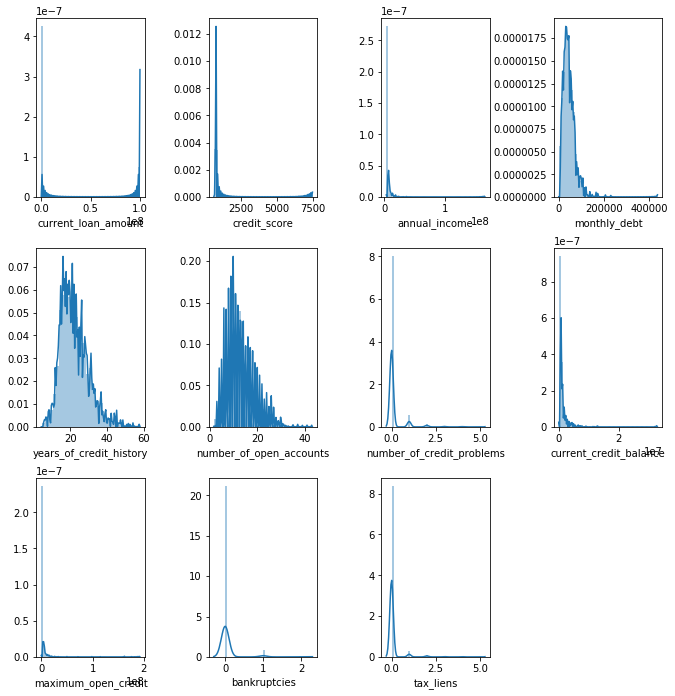

In [32]:
# 6.8 Let us see plots from this remainder data
#     All plots remain right-skewed
fig, ax = plt.subplots(3,4, figsize = (10,10))
fig.tight_layout(pad = 3.0)
ax = ax.flatten()
fig.delaxes(ax[11])
ax.shape
for i,j in enumerate(cols.values):
    abc = sns.distplot(df[j], ax = ax[i],  kde_kws={'bw': 0.1})
    

In [33]:
# 6.9 What about 'credit_score' ?
per = np.percentile(loan_status['credit_score'].values, 99)
per
df = loan_status.query('credit_score > @per')

7360.0

(12,)

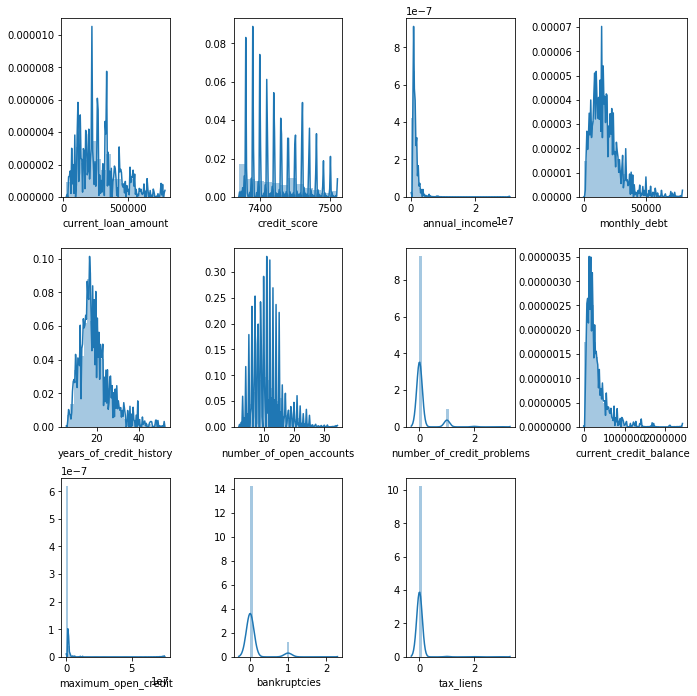

In [34]:
# 6.10 Let us see again plots from this remainder data
#      All plots still remain right-skewed
fig, ax = plt.subplots(3,4, figsize = (10,10))
fig.tight_layout(pad = 3.0)
ax = ax.flatten()
fig.delaxes(ax[11])
ax.shape
for i,j in enumerate(cols.values):
    abc = sns.distplot(df[j], ax = ax[i],  kde_kws={'bw': 0.1})
    

## Modeling

In [35]:
# 7.0 Separate target and rest of data
y = loan_status['loan_status']
X = loan_status.iloc[:,1:]
le = LabelEncoder()
y = le.fit_transform(y)

In [36]:
# 7.1 Let us now look prepare a list of categorical columns and numerical columns
cat_cols = X.select_dtypes(include = ['object']).columns.values
num_cols = X.select_dtypes(include = ['float64', 'int64']).columns.values
len(cat_cols)   # 5  categorical columns
len(num_cols)   # 11 numeric columns

4

11

In [37]:
# 7.2 Get value counts for each categorical column
[ loan_status[col].value_counts()   for col in cat_cols]

[Short Term    72207
 Long Term     27792
 Name: term, dtype: int64,
 10+ years    31121
 2 years       9133
 3 years       8169
 < 1 year      8164
 5 years       6787
 1 year        6460
 4 years       6143
 6 years       5686
 7 years       5577
 8 years       4582
 missing       4222
 9 years       3955
 Name: years_in_current_job, dtype: int64,
 Home Mortgage    48410
 Rent             42193
 Own Home          9182
 HaveMortgage       214
 Name: home_ownership, dtype: int64,
 Debt Consolidation      78551
 other                    6037
 Home Improvements        5839
 Other                    3250
 Business Loan            1569
 Buy a Car                1265
 Medical Bills            1127
 Buy House                 678
 Take a Trip               573
 major_purchase            352
 small_business            283
 moving                    150
 wedding                   115
 vacation                  101
 Educational Expenses       99
 renewable_energy           10
 Name: purpose, dty

In [38]:
# 7.3 Split dataset
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(79999, 15)

(20000, 15)

(79999,)

(20000,)

In [39]:
# 7.4
ohe = OneHotEncoder()
ss = StandardScaler()
ct = ColumnTransformer([('cat', ohe, cat_cols),('num',ss, num_cols)])

In [53]:
# 7.5 Just testing if ColumnTransformer works
#     We will shortly creating a pipeline
ct.fit(X_train)
XX = ct.transform(X_train)
XX

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('cat',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=True),
                                 array(['term', 'years_in_current_job', 'home_ownership', 'purpose'],
      dtype=object)),
                                ('num',
                                 StandardScaler(copy=True, with_mean=True,
                                                with_std=True),
                                 array(['current_loan_amount', 'credit_score', 'annual_income',
       'monthly_debt', 'years_of_credit_history',
       'number_of_open_accounts', 'number_of_credit_problems',
       'current_credit_balance', 'maximum_open

array([[ 0.   ,  1.   ,  0.   , ..., -0.085, -0.334, -0.112],
       [ 1.   ,  0.   ,  0.   , ..., -0.053, -0.334, -0.112],
       [ 0.   ,  1.   ,  0.   , ..., -0.049, -0.334, -0.112],
       ...,
       [ 0.   ,  1.   ,  0.   , ..., -0.017, -0.334, -0.112],
       [ 0.   ,  1.   ,  0.   , ..., -0.07 , -0.334, -0.112],
       [ 0.   ,  1.   ,  0.   , ..., -0.088,  2.493, -0.112]])

In [41]:
# 8.0 Instantiate classifiers with default parameters
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [42]:
# 8.1 Create two pipes, one for each model
pipe1 = Pipeline([('ct',ct),('dt', dt)])
pipe2 = Pipeline([('ct',ct),('rf', rf)])

In [43]:
# 8.2 Train algorithms
pipe1.fit(X_train, y_train)
pipe2.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('ct',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  array(['term', 'years_in_current_job', 'home_ownership', 'purpose'],
      dtype=object)),
                                                 ('num',
                                                  Standard...
       'tax_liens'], dtype=object))

Pipeline(memory=None,
         steps=[('ct',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  array(['term', 'years_in_current_job', 'home_ownership', 'purpose'],
      dtype=object)),
                                                 ('num',
                                                  Standard...
                 RandomForestClassi

In [44]:
# 8.3 Make predictions
out1 = pipe1.predict(X_test)
out2 = pipe2.predict(X_test)

In [45]:
# 8.4
np.sum(out1 == y_test)/len(y_test)   # 75.56%
np.sum(out2 == y_test)/len(y_test)   # 82%

0.7556

0.818

In [52]:
# Get feature importance
pipe1.steps[1]
pipe1.steps[1][1].feature_importances_
pipe1.named_steps['dt'].feature_importances_

('dt',
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'))

array([0.000e+00, 7.877e-03, 5.222e-03, 9.479e-03, 5.906e-03, 4.970e-03,
       6.544e-03, 6.808e-03, 5.624e-03, 6.022e-03, 6.538e-03, 4.090e-03,
       6.349e-03, 4.176e-03, 3.788e-04, 5.134e-03, 3.827e-03, 5.490e-03,
       3.197e-03, 1.170e-03, 1.639e-03, 5.536e-03, 1.421e-04, 4.288e-03,
       1.691e-03, 3.005e-03, 5.317e-04, 8.589e-04, 6.574e-04, 5.050e-03,
       0.000e+00, 1.616e-03, 5.686e-04, 6.546e-04, 1.268e-01, 2.177e-01,
       8.073e-02, 9.534e-02, 8.916e-02, 5.566e-02, 7.885e-03, 9.576e-02,
       9.740e-02, 6.099e-03, 2.483e-03])

array([0.000e+00, 7.877e-03, 5.222e-03, 9.479e-03, 5.906e-03, 4.970e-03,
       6.544e-03, 6.808e-03, 5.624e-03, 6.022e-03, 6.538e-03, 4.090e-03,
       6.349e-03, 4.176e-03, 3.788e-04, 5.134e-03, 3.827e-03, 5.490e-03,
       3.197e-03, 1.170e-03, 1.639e-03, 5.536e-03, 1.421e-04, 4.288e-03,
       1.691e-03, 3.005e-03, 5.317e-04, 8.589e-04, 6.574e-04, 5.050e-03,
       0.000e+00, 1.616e-03, 5.686e-04, 6.546e-04, 1.268e-01, 2.177e-01,
       8.073e-02, 9.534e-02, 8.916e-02, 5.566e-02, 7.885e-03, 9.576e-02,
       9.740e-02, 6.099e-03, 2.483e-03])

In [ ]:
###############################################